# EDA TripAdvisor dataset

In this notebook you can find the EDA for sprint 1.

We will first start with loading the dataset and the required libraries.

In [1]:
# Import pandas and read csv using pandas
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

original_df = pd.read_csv("./tripadvisor_dataset/restaurant_listings.csv")

# display the data and see how it formulated
pd.set_option("display.max_columns", None)
original_df.head(2)

,rank,restaurant name,general rating,number of reviews,tags,address,phone number,website url,menu url,timetable,email address,travelers choice,michelin,food rating,service rating,value rating,atmosphere rating,description,dutch description,price range,cuisines,special diets,meals,restaurant features,id
0,#1,Kin Khao - Thai Eatery,5.0 of 5 bubbles,922 reviews,$$ - $$$|Thai|Healthy|Vegetarian Friendly,"Donkersteeg 21-23, Ghent 9000 Belgium",+32 468 10 59 59,http://www.kinkhao.be/,http://www.kinkhao.be/site/menu/,True,gent@kinkhao.be,True,False,5.0,5.0,4.5,-1.0,"Differing from formal dining establishments, K...",NaN,€10 - €28,"Thai, Healthy","Vegetarian Friendly, Vegan Options, Gluten Fre...","Dinner, Drinks","Reservations, Seating, Serves Alcohol, Free Wi...",13969825
1,#1,'t Sleutelgat,5.0 of 5 bubbles,200 reviews,$$$$|French|Belgian|European,"Kasseide 78, Ninove 9400 Belgium",+32 54 56 63 09,http://www.restaurant-sleutelgat.be/,NaN,True,restaurant_sleutelgat@telenet.be,False,True,5.0,5.0,4.5,5.0,NaN,NaN,€32 - €74,"French, Belgian, European","Vegetarian Friendly, Vegan Options, Gluten Fre...","Lunch, Dinner","Free Wifi, Reservations, Outdoor Seating, Seat...",740727


## Splitting the data

The first thing we'll do is split the data in a test set and a trainings set. This is to avoid data snooping when we finally want to use ML

In [2]:
from random import shuffle
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(original_df,test_size=0.2,train_size=0.8,shuffle=True)
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2064 entries, 2346 to 2309
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rank                 1880 non-null   object 
 1   restaurant name      2064 non-null   object 
 2   general rating       2064 non-null   object 
 3   number of reviews    2064 non-null   object 
 4   tags                 1895 non-null   object 
 5   address              2064 non-null   object 
 6   phone number         1893 non-null   object 
 7   website url          1749 non-null   object 
 8   menu url             726 non-null    object 
 9   timetable            2064 non-null   bool   
 10  email address        1072 non-null   object 
 11  travelers choice     2064 non-null   bool   
 12  michelin             2064 non-null   bool   
 13  food rating          2064 non-null   float64
 14  service rating       2064 non-null   float64
 15  value rating         2064 non-null 

## Clean the data

we will start with numeric data, labeling each attribute with the correct type

In [3]:
print(df_train.info())
df_train.head(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2064 entries, 2346 to 2309
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rank                 1880 non-null   object 
 1   restaurant name      2064 non-null   object 
 2   general rating       2064 non-null   object 
 3   number of reviews    2064 non-null   object 
 4   tags                 1895 non-null   object 
 5   address              2064 non-null   object 
 6   phone number         1893 non-null   object 
 7   website url          1749 non-null   object 
 8   menu url             726 non-null    object 
 9   timetable            2064 non-null   bool   
 10  email address        1072 non-null   object 
 11  travelers choice     2064 non-null   bool   
 12  michelin             2064 non-null   bool   
 13  food rating          2064 non-null   float64
 14  service rating       2064 non-null   float64
 15  value rating         2064 non-null 

,rank,restaurant name,general rating,number of reviews,tags,address,phone number,website url,menu url,timetable,email address,travelers choice,michelin,food rating,service rating,value rating,atmosphere rating,description,dutch description,price range,cuisines,special diets,meals,restaurant features,id
2346,#766,Gigi,2.5 of 5 bubbles,40 reviews,$$ - $$$|Italian,"Belfortstraat 24, Ghent 9000 Belgium",+32 468 50 87 03,http://gigi6161.be/,NaN,True,info@gigi6161.be,False,False,3.0,2.5,2.5,-1.0,NaN,NaN,No pricing available,Italian,NaN,"Breakfast, Lunch, Dinner, Brunch, Drinks","Reservations, Seating, Accepts Credit Cards, T...",23859309
1634,#44,Tao Yuen,4.0 of 5 bubbles,9 reviews,$|Chinese|Cantonese,"Mechelsesteenweg 48, Dendermonde 9200 Belgium",+32 52 41 01 36,NaN,NaN,False,NaN,False,False,4.0,4.0,4.5,-1.0,NaN,NaN,No pricing available,Chinese,NaN,NaN,Reservations,7283011


we will start by turning rank, general rating, number of reviews to numerical values

In [4]:

df_train["rank"]=df_train["rank"].str.replace("#","").astype(float)
df_train["general rating"]=df_train["general rating"].map(lambda x: x.split(" ")[0]).astype(float)
df_train["number of reviews"]=df_train["number of reviews"].map(lambda x: x.split(" ")[0].replace(",","")).astype(float)

we can start by looking at the distributions of these numerical features

In [5]:
numerical_cols=df_train.select_dtypes(include= ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns

In [6]:
#drop id because its not relevant for the plot
numerical_cols=numerical_cols.drop("id")
numerical_cols

Index(['rank', 'general rating', 'number of reviews', 'food rating',
       'service rating', 'value rating', 'atmosphere rating'],
      dtype='object')

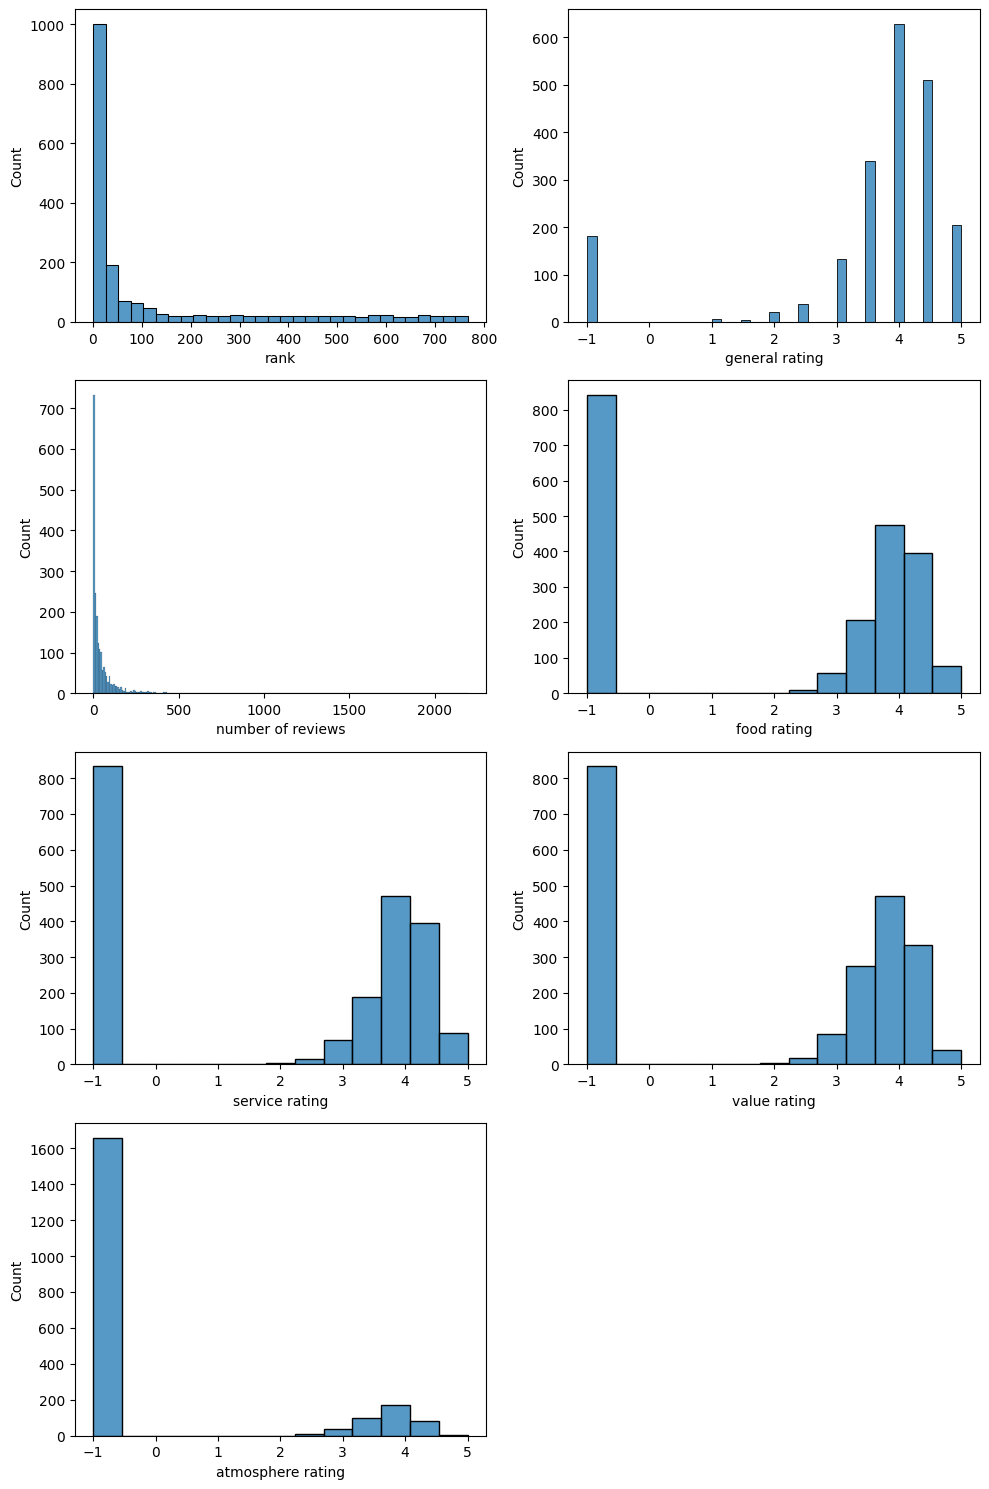

In [7]:
fig=plt.figure(figsize=(10,15))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,2,i+1)
    sns.histplot(df_train[col])
fig.tight_layout()
plt.show()

what we can see from these distributions is:
* most restaurants have a low rank (lower is better)
* ratings with value -1 mean that they are missing data, there is a lot of missing data visible


let's take a closer look at number of reviews

### number of reviews

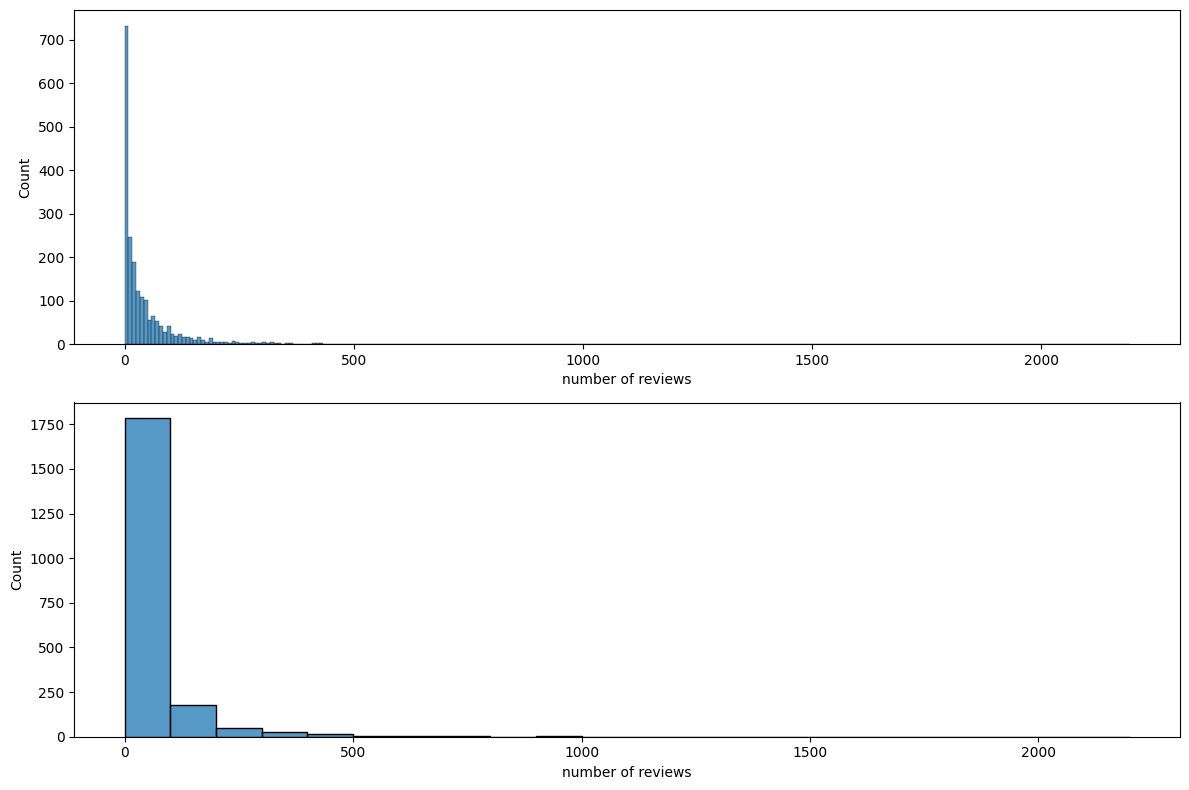

In [8]:
fig=plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
sns.histplot(df_train["number of reviews"])
plt.subplot(2,1,2)
sns.histplot(df_train["number of reviews"],binwidth=100)
fig.tight_layout()
plt.show()


In [9]:
print(df_train["number of reviews"].value_counts())
zeros=df_train["number of reviews"].isna().sum()
print(f"number of missing values is {zeros}")

0.0      181
1.0      120
2.0       95
3.0       85
4.0       63
        ... 
336.0      1
298.0      1
499.0      1
356.0      1
155.0      1
Name: number of reviews, Length: 272, dtype: int64
number of missing values is 0


There are a lot of restaurants with 0 reviews and no missing values. how many exactly?

In [10]:
perc_no_review=df_train["number of reviews"].value_counts()[0]/len(df_train)
print(f"{perc_no_review*100:.2f}% of the restaurants have no reviews!")


8.77% of the restaurants have no reviews!


We decide a treshhold for restaurants with low reviews = 4. So restaurants with 3 or less reviews we consider "hidden treasures"

In [11]:
perc_hidden=df_train["number of reviews"].value_counts()[0:3].sum()/len(df_train)
print(f"percentage of hidden treasures: {perc_hidden*100:.2f}%")

percentage of hidden treasures: 23.30%


are they really hidden treasures?
* what are the ratings of these hidden treasures? maybe they don't have many reviews bacause people don't eat there because of a bad rating or maybe because of the location.
* is there a correlation between the location of a restaurant and the fact if its a hidden treasure or not? maybe there are clusters? maybe big cities don't have these "hidden treasures"

we will come back to this later, first we can start by extracting the city

In [12]:
df_train['city'] = df_train["address"].str.split(', ').str[-1].str.split(" ").str[0]

we can also use some external libraries to extract latitute and longitude from the full address (so its easier to plot)

In [104]:
import requests
import urllib.parse
def getCoordinates(address):

    url = 'https://nominatim.openstreetmap.org/search/' + urllib.parse.quote(address) +'?format=json'
    response = requests.get(url).json()
    # print(response)
    if(len(response)>0):
        return response[0]["lat"],response[0]["lon"]
    else:
        return np.NaN,np.NaN;

In [13]:
# coords=df_train.apply(lambda row : getCoordinates(row["address"]),axis=1)
# we cancelled this idea beacuse it takes too long to fetch the coordinates for each address ಥ_ಥ

In [27]:
df_train.head(2)

,rank,restaurant name,general rating,number of reviews,tags,address,phone number,website url,menu url,timetable,email address,travelers choice,michelin,food rating,service rating,value rating,atmosphere rating,description,dutch description,price range,cuisines,special diets,meals,restaurant features,id,city
2346,766.0,Gigi,2.5,40.0,$$ - $$$|Italian,"Belfortstraat 24, Ghent 9000 Belgium",+32 468 50 87 03,http://gigi6161.be/,NaN,True,info@gigi6161.be,False,False,3.0,2.5,2.5,-1.0,NaN,NaN,No pricing available,Italian,NaN,"Breakfast, Lunch, Dinner, Brunch, Drinks","Reservations, Seating, Accepts Credit Cards, T...",23859309,Ghent
1634,44.0,Tao Yuen,4.0,9.0,$|Chinese|Cantonese,"Mechelsesteenweg 48, Dendermonde 9200 Belgium",+32 52 41 01 36,NaN,NaN,False,NaN,False,False,4.0,4.0,4.5,-1.0,NaN,NaN,No pricing available,Chinese,NaN,NaN,Reservations,7283011,Dendermonde


now we can also look at the price range

In [28]:
df_train["price range"]

2346    No pricing available
1634    No pricing available
1708    No pricing available
383     No pricing available
975     No pricing available
                ...         
2270    No pricing available
2298    No pricing available
2344    No pricing available
2130    No pricing available
2309    No pricing available
Name: price range, Length: 2064, dtype: object

we can split this up into upper_price and lowr_price if it's available

In [33]:
temp=df_train["price range"].str.replace("No pricing available","nan - nan").str.replace("€","").str.split("-",expand=True).rename(columns={0:"lower price",1:"upper price"})
df_train["lower_price"]=temp["lower price"].astype(float)
df_train["upper_price"]=temp["upper price"].astype(float)


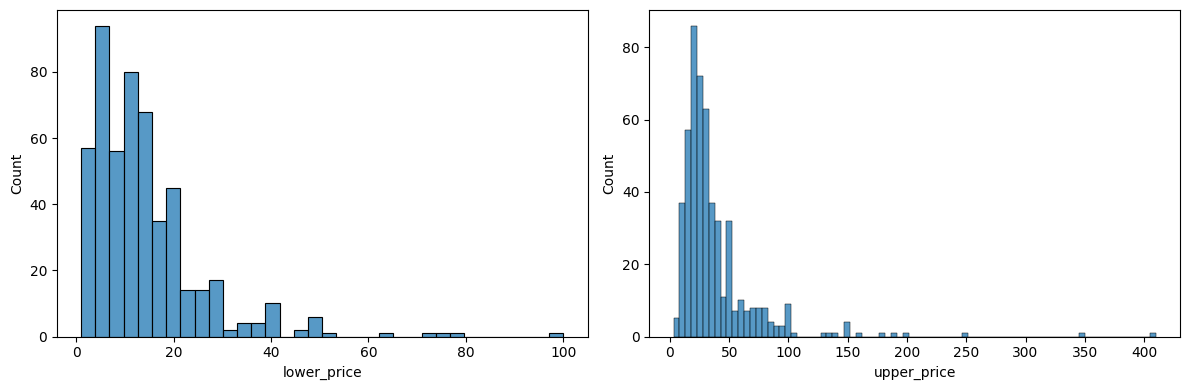

In [37]:
fig=plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(df_train["lower_price"])
plt.subplot(1,2,2)
sns.histplot(df_train["upper_price"])
fig.tight_layout()
plt.show()


as we can see there are restaureants who have minimum prices of €100 and upper prices of more than €400, lets check if that's not a typo

In [73]:
high_upper=df_train[df_train["upper_price"]>150]
high_upper[["restaurant name","rank","general rating","number of reviews","michelin","food rating","service rating","value rating","atmosphere rating","lower_price", "upper_price","meals"]]

,restaurant name,rank,general rating,number of reviews,michelin,food rating,service rating,value rating,atmosphere rating,lower_price,upper_price,meals
533,Ter schroeven,5.0,4.5,61.0,False,4.5,4.5,4.5,4.5,71.0,190.0,"Lunch, Dinner, Late Night"
1344,iGent,496.0,4.5,18.0,False,1.0,1.5,1.5,1.0,1.0,200.0,"Lunch, Dinner"
272,Amatsu,141.0,4.0,149.0,True,4.5,4.5,4.0,4.0,39.0,157.0,"Dinner, Late Night"
2195,Divan Palace,713.0,3.0,9.0,False,3.5,3.5,4.0,-1.0,2.0,410.0,"Breakfast, Lunch, Dinner"
982,Asian King,389.0,4.0,33.0,False,4.0,4.0,4.0,-1.0,4.0,180.0,"Lunch, Dinner"
1268,K27,478.0,4.5,11.0,False,-1.0,-1.0,-1.0,-1.0,2.0,349.0,Drinks
22,Portobelfino,2.0,4.5,400.0,False,4.5,4.5,4.5,4.5,100.0,250.0,"Lunch, Dinner, Late Night"


from the restaurants who have high upper prices:
* there is 1 with a michelin star
* on average they have a general rating >=4
* the lower price is exteremely low! maybe because they include drinks in their lower price
* we conclude that rank propably means popularity. the restaurant Amatsu has a michelin star, which means the food, service,... is excellent but it's rank is only 272. Average people don't go to michelin starred restaurant very often so that is maybe the cause of the lover rank.
* the data is a little messed up. iGent has an upper price of €200. as students of Ghent University we can testify that that is incorrect

In [85]:
high_lower=df_train[df_train["lower_price"]>=40]
high_lower=high_lower[["restaurant name","rank","general rating","number of reviews","michelin","food rating","service rating","value rating","atmosphere rating","lower_price", "upper_price","meals"]]

In [89]:
print(f"number of retaurants with a michelin star: {high_lower.michelin.sum()}")
high_lower

number of retaurants with a michelin star: 5


,restaurant name,rank,general rating,number of reviews,michelin,food rating,service rating,value rating,atmosphere rating,lower_price,upper_price,meals
996,De Visitor,9.0,4.5,11.0,False,5.0,4.5,4.5,-1.0,50.0,80.0,"Dinner, Lunch, Brunch"
538,Restaurant G.L.I.S.S.,9.0,4.5,41.0,False,4.5,4.5,4.5,4.0,40.0,72.0,"Dinner, Lunch"
533,Ter schroeven,5.0,4.5,61.0,False,4.5,4.5,4.5,4.5,71.0,190.0,"Lunch, Dinner, Late Night"
588,Aroy Aroy,256.0,4.5,21.0,False,4.5,5.0,4.5,-1.0,45.0,55.0,Dinner
17,A Food Affair,11.0,4.5,254.0,True,4.5,4.5,4.5,4.0,40.0,80.0,Dinner
421,Les Abris,4.0,4.5,38.0,True,4.5,4.5,4.0,-1.0,52.0,64.0,"Dinner, Lunch"
3,Roots,3.0,5.0,282.0,True,5.0,4.5,5.0,-1.0,40.0,80.0,"Lunch, Dinner"
281,Herbert Robbrecht,2.0,4.5,103.0,False,4.5,4.0,4.0,4.0,48.0,68.0,"Lunch, Dinner"
298,Huyze De Baere,7.0,4.5,43.0,False,5.0,4.5,4.5,-1.0,65.0,150.0,"Dinner, Lunch"
433,John Dory,205.0,5.0,20.0,False,5.0,5.0,5.0,-1.0,48.0,70.0,"Dinner, Lunch"


here we don't see extreme price ranges like with the restaurants with high upper ratings. Only 5 restaurants have a michelin star and most of them have a decent general rating

also interesting to note is that in this subgroup, the ranks are much higher. so if I want my restaurant to have a high rank, it is better to not have extreme high upper prices so my restaurant is more appealing to the general public

### cheap_restaurants

In [112]:
cheap_restaurants=df_train[df_train["upper_price"]<=30]
cheap_restaurants=cheap_restaurants[["restaurant name","rank","general rating","number of reviews","michelin","food rating","service rating","value rating","atmosphere rating","lower_price", "upper_price","meals"]]

<__array_function__ internals>:180: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.



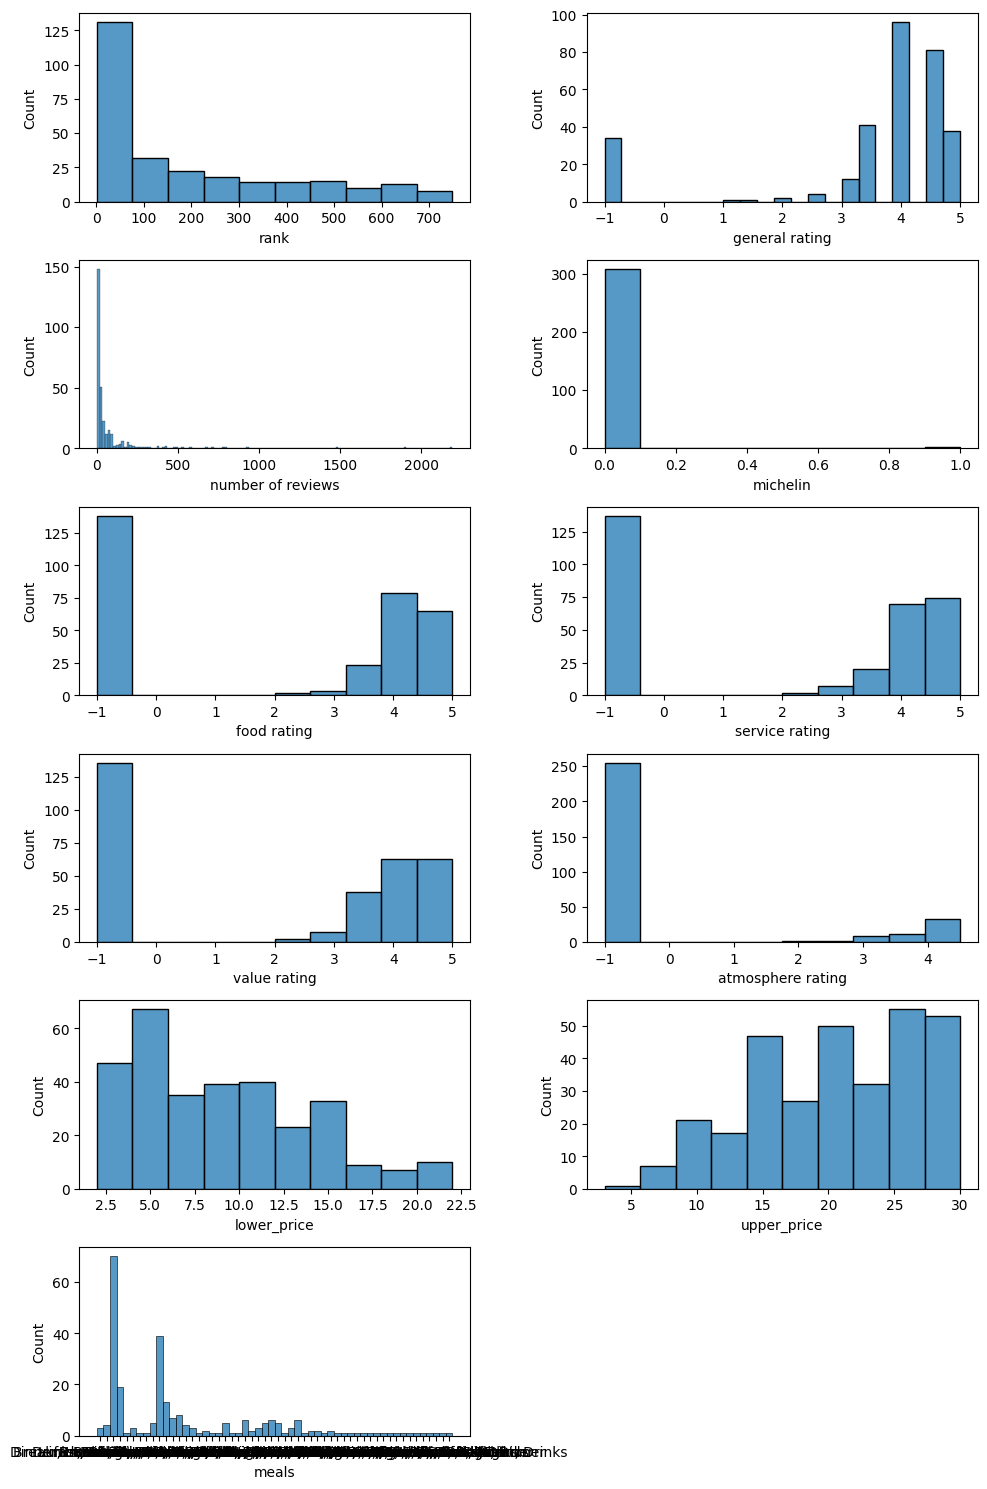

In [113]:
fig=plt.figure(figsize=(10,15))
for i, col in enumerate(["rank","general rating","number of reviews","michelin","food rating","service rating","value rating","atmosphere rating","lower_price", "upper_price","meals"]):
    plt.subplot(6,2,i+1)
    sns.histplot(cheap_restaurants[col])
fig.tight_layout()
plt.show()

* we can see that a lot of cheap restaurants have a high rank, this confirms our hypothesis that rank is a proxy for popularity!
* we can see a very clear peak in the meals chart, lets take a closer look


In [117]:
cheap_restaurants.meals.value_counts()

Lunch, Dinner                                70
Lunch, Dinner, Drinks                        39
Dinner                                       19
Dinner, Lunch                                13
Lunch, Dinner, Late Night                     8
Breakfast, Lunch, Brunch, Drinks              7
Drinks                                        6
Lunch                                         6
Breakfast, Lunch, Dinner                      6
Dinner, Lunch, Drinks                         5
Lunch, Dinner, Brunch                         5
Lunch, Dinner, Brunch, Drinks                 5
Lunch, Dinner, Late Night, Drinks             5
Drinks, Lunch, Dinner                         4
Breakfast, Lunch, Dinner, Drinks              4
Lunch, Dinner, Brunch, Late Night             3
Breakfast, Lunch, Brunch                      3
Dinner, Late Night, Drinks                    3
Lunch, Drinks                                 3
Dinner, Drinks                                3
Lunch, Breakfast, Dinner                

In [148]:
meals=cheap_restaurants.meals.str.split(",",expand=True)
pd.concat((meals[0],meals[1],meals[2],meals[3],meals[4])).str.strip().value_counts()

Lunch         218
Dinner        214
Drinks        110
Breakfast      47
Brunch         42
Late Night     23
dtype: int64

From all the cheap restaurants, most types of meals offered is Lunch, which is expected. 
But it's also interesting to note most of the cheap restaurants also serve Dinner and Drinks.


A lot of the ratings are -1, lets look at the cheap restaurants without these contaminations

<__array_function__ internals>:180: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.



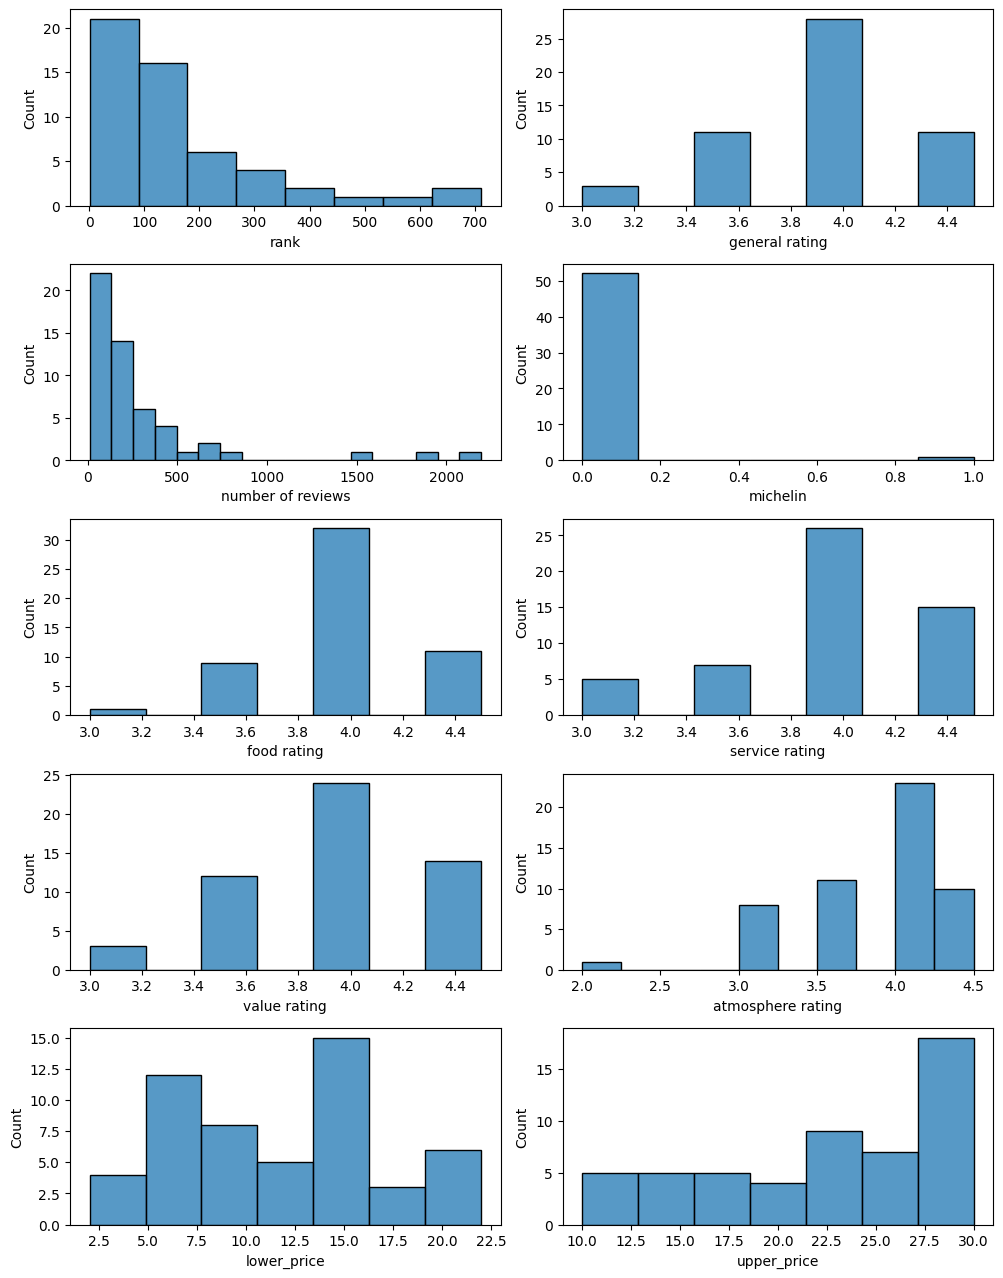

In [150]:
cheap_restaurants_with_rating=cheap_restaurants.replace(-1,np.nan).dropna()
fig=plt.figure(figsize=(10,15))
for i, col in enumerate(["rank","general rating","number of reviews","michelin","food rating","service rating","value rating","atmosphere rating","lower_price", "upper_price"]):
    plt.subplot(6,2,i+1)
    sns.histplot(cheap_restaurants_with_rating[col])
fig.tight_layout()
plt.show()

* general-, food-,service- and value rating have the same distribution. from this we suspect that these values have high correlations. If one of my ratings is good, the others are very close to it. we could then drop the reduntant features.

### Hidden treasures
lets look at these hidden treasures in more detail

In [60]:
len(hidden_treasures)

481

In [20]:
hidden_treasures=df_train[df_train["number of reviews"]<=3]
hidden_treasures.replace(-1,np.nan).isna().sum()

rank                   183
restaurant name          0
general rating         181
number of reviews        0
tags                   116
address                  0
phone number            83
website url            150
menu url               433
timetable                0
email address          261
travelers choice         0
michelin                 0
food rating            481
service rating         481
value rating           481
atmosphere rating      481
description            358
dutch description      420
price range              0
cuisines               126
special diets          480
meals                  268
restaurant features    424
id                       0
city                     0
dtype: int64

we can see that all of the hidden treasures have no rating!

in a seperate notebook i added coordinates hier nog mooie tekst schrijven

In [92]:
coord=pd.read_csv("coordinates.csv")

In [97]:
coord

,id,coord
0,13969825,"('51.0548994', '3.7223248')"
1,740727,"('50.7887051', '4.052819574178704')"
2,12188645,"(nan, nan)"
3,9710340,"('51.0582196', '3.7222621')"
4,8298124,"('51.0268308', '4.1005587')"
...,...,...
2576,18220557,"('50.8528124', '3.7866609')"
2577,23571474,"('50.9032568', '3.5050821')"
2578,3956680,"('50.947908850000005', '4.097626326789348')"
2579,23363568,"('50.9478251', '4.098753863305806')"


In [70]:
df_train.groupby(["city"])["general rating"]

city
Aaigem        4.000000
Aalst         3.512295
Aalter        3.761905
Adegem        4.083333
Afsnee        3.000000
                ...   
Zomergem      4.200000
Zottegem      3.564103
Zulte         4.428571
Zwalm         3.357143
Zwijnaarde    4.500000
Name: general rating, Length: 157, dtype: float64

ideas:
* zoek correlatie tussen rank en een van de rating features
* mss tussen de rating features onderling? dat ze zelfde waarde aangeven en dus overbodig zijn?
* kijk of er clustering is van restaurant prijs en locatie of restaurant prijs en type restaurant. vb er zijn veel meer japanse restaurants in de dure categorie dan japanse restaurants in de goedkope ...
* zie github voor meer